# Assignment 2 of S Deepak Narayanan, 16110142

## Question 2. follows below 
### Question 1. is just to download the dataset, which has already been done

### Tokenization using Tokenizer

In [18]:
## Not used in this assignment
from nltk.tokenize import sent_tokenize
file = open('alice.txt').read()
data_temp = sent_tokenize(file)

### Additional Dataset cleaning 

In [19]:
#data_temp = data
for dt in range(len(data_temp)):
    data_temp[dt] = data_temp[dt].replace('\n', "")
    data_temp[dt] = data_temp[dt].replace('\n', "")
    data_temp[dt] = data_temp[dt].replace('\ '," ")
    data_temp[dt] = data_temp[dt].replace('"',' ' )
    data_temp[dt] = data_temp[dt].replace("  "," ")
data_final = []
for data in data_temp:
    data = '<s> '+data
    data = data + ' </s>'
    data_final.append(data)
data_final = data_temp
# Final Data is Data Final itself
del data_temp

### Splitting the data into 80:20

In [20]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data_final, test_size = 0.2, random_state= 10)

## Question 3. follows below

### Unigram Model and MLE for Unigram

In [21]:
unigram_count = {}
for data in data_final:
    arr = data.split()
    for elem in arr:
        if elem in unigram_count:
            unigram_count[elem]+=1
        else:
            unigram_count[elem]=1
## Unigram Count is a dictionary that contains all the Unigrams with their number of occurrences in the corpus.
total_count = sum(unigram_count.values())
mle_unigram = {}
for elem in unigram_count:
    mle_unigram[elem] = unigram_count[elem]/total_count

### Bigram Model and MLE for Bigram

In [22]:
# Bigram Count contains all the bigrams with their number of occurrences in the corpus. 
bigram_count = {}
for data in data_final:
    tmp_arr = data.split()
    for i in range(len(tmp_arr)):
        try:
            if (tmp_arr[i],tmp_arr[i+1]) in bigram_count:
                bigram_count[(tmp_arr[i],tmp_arr[i+1])]+=1
            if (tmp_arr[i], tmp_arr[i+1]) not in bigram_count:
                 bigram_count[(tmp_arr[i],tmp_arr[i+1])]=1
        except:
            continue
mle_bigram = {}
for i in bigram_count:
    mle_bigram[i] = bigram_count[i]/unigram_count[i[0]]

### Trigram Count and MLE for Trigrams

In [23]:
trigram_count = {}
for data in data_final:
    tmp_arr = data.split()
    for i in range(len(tmp_arr)):
        try:
            if (tmp_arr[i],tmp_arr[i+1],tmp_arr[i+2]) in trigram_count:
                trigram_count[(tmp_arr[i],tmp_arr[i+1],tmp_arr[i+2])]+=1
            if (tmp_arr[i], tmp_arr[i+1],tmp_arr[i+2]) not in trigram_count:
                 trigram_count[(tmp_arr[i],tmp_arr[i+1],tmp_arr[i+2])]=1
        except:
            continue
mle_trigram = {}
for i in trigram_count:
    mle_trigram[i] = trigram_count[i]/bigram_count[(i[0],i[1])]

### Quadgram Count and MLE for Quadgram

In [24]:
quadgram_count = {}
for data in data_final:
    tmp_arr = data.split()
    for i in range(len(tmp_arr)):
        try:
            if (tmp_arr[i],tmp_arr[i+1],tmp_arr[i+2], tmp_arr[i+3]) in quadgram_count:
                quadgram_count[(tmp_arr[i],tmp_arr[i+1],tmp_arr[i+2], tmp_arr[i+3])]+=1
            if (tmp_arr[i], tmp_arr[i+1],tmp_arr[i+2], tmp_arr[i+3]) not in quadgram_count:
                 quadgram_count[(tmp_arr[i],tmp_arr[i+1],tmp_arr[i+2], tmp_arr[i+3])]=1
        except:
            continue
mle_quadgram = {}
for i in quadgram_count:
    mle_quadgram[i] = quadgram_count[i]/trigram_count[(i[0],i[1], i[2])]

### The below unic, bigc, tric, quadc, contains the number of unigrams, bigrams, trigrams and quadgrams in the corpus. Using the entire corpus in this case. The number of possible ones is also covered in here.

In [25]:
unic = len(unigram_count)
bigc = len(bigram_count)
tric = len(trigram_count)
quadc = len(quadgram_count)

possible= {i:0 for i in range(1,5)}
possible[1] = unic
possible[2] = unic**2
possible[3] = unic**3
possible[4] = unic**4

present = {1:unic, 2:bigc, 3:tric, 4:quadc}
print("The total number of n-grams possible and those present are respectively")
for i in present:
    print(str(i) + '-gram '+str(possible[i])+','+str(present[i]))

The total number of n-grams possible and those present are respectively
1-gram 6277,6277
2-gram 39400729,16646
3-gram 247318375933,21014
4-gram 1552417445731441,21314


## Q4. (b) Sentence Probabilities
### I am randomly taking 10 sentences from the corpus and displaying their probability using the unigram, bigram, trigram and the quadgram models

In [26]:
from math import log

def prob_sent(sentence, ngram):
    
    # Probability of Formation of a sentence using a Unigram
    if ngram==1:
        flag = 1
        array = sentence.split()
        product = 0
        for i in array:
            try:
                product+=mle_unigram[i]
            except:
                flag = 0
                break
        if(flag==0):
            return 100
        return product
        
            
        '''
        prob_unigram_sent = {}
        for sentence in data_final:
            array = sentence.split()
            product = 1
            for i in array:
                product*=mle_unigram[i]
            prob_unigram_sent[sentence] = product
        '''
        
    # Probability of formation of a sentence using a bigram
    if ngram==2:
        flag = 1
        array = sentence.split()
        product = 0
        for i in range(len(array)-1):
            try:
                product+=mle_bigram[(array[i],array[i+1])]
            except:
                flag = 0
                break
        if(flag==0):
            return 100
        return product
    '''
        prob_bigram_sent  = {}
        for sentence in data_final:
            array = sentence.split()
            product = 1
            for i in range(len(array)):
                try:
                    product*=mle_bigram[(array[i],array[i+1])]
                except:
                    continue
            prob_bigram_sent[sentence] = product
    '''
    # Probability of sentence formation using trigrams
    if ngram==3:
        flag = 1
        array = sentence.split()
        product = 1
        for i in range(len(array)-2):
            try:
                product+=log(mle_trigram[(array[i],array[i+1], array[i+2])])
            except:
                flag = 0
                break
        if(flag==0):
            return 100
        return product
    '''
    prob_trigram_sent  = {}
    for sentence in data_final:
        array = sentence.split()
        product = 1
        for i in range(len(array)):
            try:
                product*=mle_trigram[(array[i],array[i+1], array[i+2])]
            except:
                continue
        prob_trigram_sent[sentence] = log(product)
    '''
    #Probability of a sentence using quadgram 
    if ngram==4:
        flag = 1
        array = sentence.split()
        product = 0
        for i in range(len(array)-3):
            try:
                product+=log(mle_quadgram[(array[i],array[i+1], array[i+2], array[i+3])])
            except:
                flag = 0
                break
        if(flag==0):
            return 100
        return product
    '''
    prob_quadgram_sent = {}
    for sentence in data_final:
        array = sentence.split()
        product = 1
        for i in range(len(array)):
            try:
                product*=mle_quadgram[(array[i],array[i+1], array[i+2], array[i+3])]
            except:
                continue
        prob_quadgram_sent[sentence] = product
    '''

### The results are below: If 100, then the probability is 0, else the values are those computed from log probabilities

In [27]:
import random
sentence_list_test = []
for i in range(10):
    sentence_list_test.append(random.choice(data_final))
for i in range(10):
    print('The sentence chosen is \n',sentence_list_test[i])
    for j in range(4):
         print('The Probability using '+str(j+1)+' gram model is ', prob_sent(sentence_list_test[i],j+1))
    print()

The sentence chosen is 
 ‘Their heads are gone, if it please your Majesty!’ the soldiers shoutedin reply.
The Probability using 1 gram model is  0.07467901836502518
The Probability using 2 gram model is  4.377369608762241
The Probability using 3 gram model is  -4.12396397940326
The Probability using 4 gram model is  -1.3862943611198906

The sentence chosen is 
 ‘Fetch me my gloves this moment!’Then came a little pattering of feet on the stairs.
The Probability using 1 gram model is  0.11254672517471151
The Probability using 2 gram model is  3.735406986988175
The Probability using 3 gram model is  -6.414874040816802
The Probability using 4 gram model is  -1.791759469228055

The sentence chosen is 
 The Lobster QuadrilleThe Mock Turtle sighed deeply, and drew the back of one flapper acrosshis eyes.
The Probability using 1 gram model is  0.10832114415732164
The Probability using 2 gram model is  5.8081405408229125
The Probability using 3 gram model is  -2.4011973816621555
The Probability 

## Q4. (a) Generating Sentences by using MLEs for the N-Gram Model

In [37]:
# I have to do something

## Q5., Q6. and Q7. follow below

##  Add One Smoothing and Good Turing Smoothing

### Below cell finds all the possible bigrams and puts all of them in the bigram_total dictionary

In [28]:
bigram_total = {}
for i in unigram_count:
    for j in unigram_count:
        bigram_total[(i,j)] = 0
## Created above all the possible bigrams

### The cell below is used for performing Add-One Smoothing

In [29]:
add_one = {}
for data in bigram_total:
    if data not in bigram_count:
        add_one[data] = (1)/( unigram_count[data[0]]+ len(unigram_count))
    else:
        add_one[data] = (bigram_count[data]+1)/((unigram_count[data[0]]) + len(unigram_count))

### Drasatic Changes in Probabilties


In [30]:
## The drastic changes after Add One Smoothing are
## Example 1
print(mle_bigram[('pink', 'eyes')], add_one[('pink', 'eyes')])

## Example 2
print(mle_bigram[('book,’', 'thought')], add_one[('book,’', 'thought')])

## Example 3
print(mle_bigram[('or', 'conversations')], add_one[('or', 'conversations')])


1.0 0.00031857279388340236
0.5 0.00031852205765249244
0.016666666666666666 0.00031560675398453525


#### The above change in MLEs is due to the fact that Add-One has taking too much mass from something that occurs and has assigned it to something that has never occurred. 

### Perplexity for Add_One Smoothing on test data


In [31]:
import math
def add_one_perplexity(data):
    prob = 0
    count = 0
    for i in data:
        arr = i.split()
        for j in range(len(arr)):
            count+=1
            #print(math.log(add_one[(arr[j],arr[j+1])]))
            try:
               
                prob+=math.log(add_one[(arr[j],arr[j+1])])
                #print('b')
            except:
                continue
    return math.exp(-1/(count)*prob)
print(' The perplexity of Add One Smoothing is ',add_one_perplexity(test_data))
del add_one

 The perplexity of Add One Smoothing is  1427.1236631270838


### Good Turing Count and discounting value

In [32]:
## Computed the count of the number of bigrams with a particular count
good_turing = {}
for i in bigram_count:
    if bigram_count[i] in good_turing:
        good_turing[bigram_count[i]]+=1
    else:
        good_turing[bigram_count[i]]=1

### 1. The below plot is almost a straight line for value <5. The discounting is ~0.6 for c<7.  
Note that 0 has a very high count because of the fact that number of times a word occurs is the maximum. I have not taken till 10 because of missing N-c values. 

 The discounting values are:  {0: 0.8591253153910849, 1: 0.1792881616670163, 2: 1.0109204368174727, 3: 1.6851851851851851, 4: 3.434065934065934, 5: 3.504, 6: 5.36986301369863, 7: 5.0, 8: 7.457142857142857}


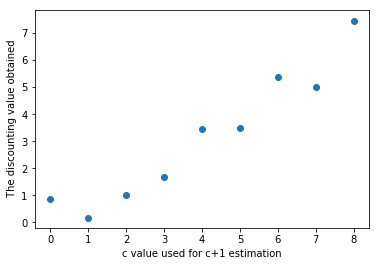

In [33]:
after_count = {}
after_count[0] = good_turing[1]/(sum(good_turing.values()))
for i in range(1,9):
    after_count[i] = (good_turing[i+1]*(i+1))/(good_turing[i])
import matplotlib.pyplot as plt
plt.xlabel('c value used for c+1 estimation')
plt.ylabel(' The discounting value obtained')
plt.scatter(after_count.keys(),after_count.values())
print(' The discounting values are: ', after_count)

### If there is a missing N(c+1) or N(c), then I am using the bigram mle here. 
### Below is the computation of probabilities using Good Turing Smoothing on the dataset

In [35]:
gt = {}
sum_ = len(bigram_count)
for data in bigram_total:
    if data not in bigram_count:
        gt[data] = good_turing[1]/(sum(good_turing.values()))
    else:
        try:
            gt[data] = (good_turing[bigram_count[data]]*bigram_count[data])/(good_turing[bigram_count[data]-1]*sum_)
        except:
            gt[data] = mle_bigram[data]

### Perplexity for Good Turing on test data

In [36]:
def good_turing_perplexity(data):
    prob = 0
    count = 0
    for i in data:
        arr = i.split()
        for j in range(len(arr)):
            count+=1
            #print(math.log(add_one[(arr[j],arr[j+1])]))
            try:
                prob+=math.log(gt[(arr[j],arr[j+1])])
                #print('b')
            except:
                continue
    return math.exp(-1/(count)*prob)
print (good_turing_perplexity(test_data))
del gt

95.44184960056846


#### Clearly among both Add-One and Good Turing, Good Turing performs ~ 15 times better with a perplexity value of 95.44 over Add-One's Perplexity Value of 1427.123